In [1]:
import numpy as np
import pandas as pd


In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.shape

(2200, 8)

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
crop.duplicated().sum()

0

In [7]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [9]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=  crop['label'].map(crop_dict)

In [10]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [11]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [12]:
X = crop.drop(['crop_num'],axis=1)
y = crop['crop_num']

In [13]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [14]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [15]:
y.shape

(2200,)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [19]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [20]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")
    print("Confusion matrix : ",confusion_matrix(y_test,ypred))
    print("==========================================================")
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print the results
    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Validation Accuracy: {val_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}\n")
    

Logistic Regression  with accuracy : 0.9068181818181819
Confusion matrix :  [[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  8  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  

Random Forest  with accuracy : 0.9886363636363636
Confusion matrix :  [[17  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  

C:\Users\Payal Edline\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost  with accuracy : 0.1409090909090909
Confusion matrix :  [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 

In [27]:
# finally selected randomforest model

rfc = RandomForestClassifier(criterion="gini")
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.8727272727272727

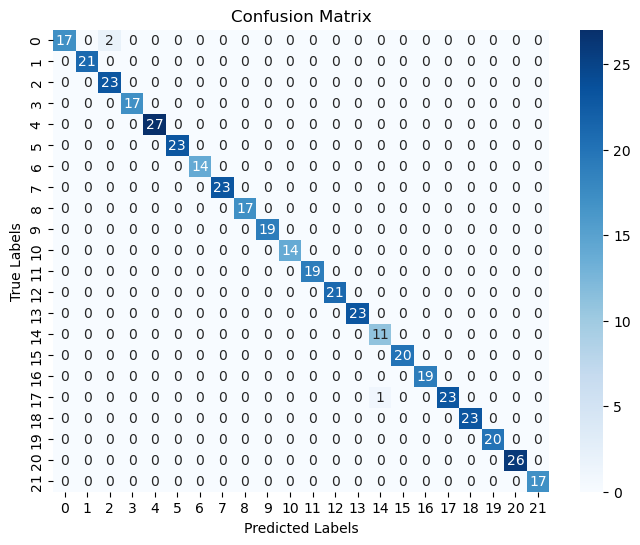

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are already defined
# y_test: true labels, y_pred: predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the plot
plt.show()

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.95
Validation Accuracy: 0.94
Test Accuracy: 0.92


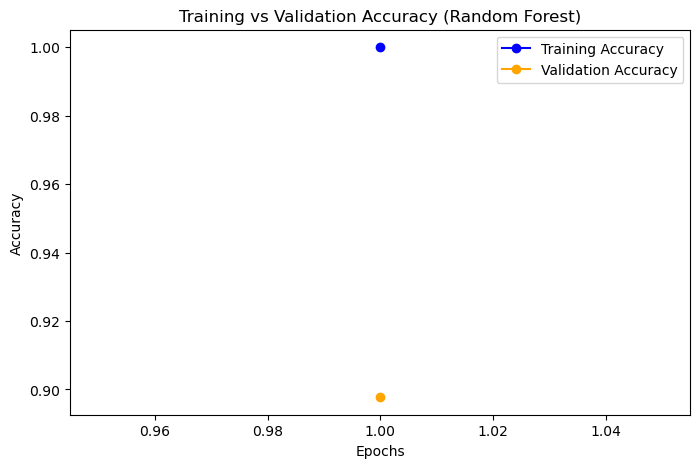

In [28]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
val_accuracy = accuracy_score(y_val, val_preds)

# Plotting the accuracy
epochs = [1]  # Since Random Forest doesn't use epochs, we treat it as a single epoch
train_acc_list = [train_accuracy]
val_acc_list = [val_accuracy]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc_list, marker='o', label='Training Accuracy', color='blue')
plt.plot(epochs, val_acc_list, marker='o', label='Validation Accuracy', color='orange')

plt.title('Training vs Validation Accuracy (Random Forest)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
for model_name, model in models.items():
    print(f"--- {model_name} ---")
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on train, validation, and test datasets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print the results
    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Validation Accuracy: {val_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}\n")

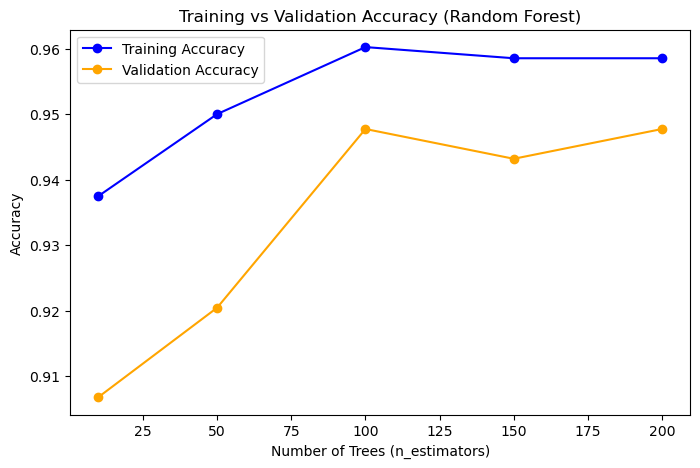

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulate "epochs" by varying n_estimators and controlling overfitting parameters
epochs = [10, 50, 100, 150, 200]  # Simulated iterations
train_accuracies = []
val_accuracies = []

# Train Random Forest with controlled depth to reduce overfitting
for n_estimators in epochs:
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=5,  # Restrict tree depth to avoid overfitting
        min_samples_split=10,  # Minimum samples to split an internal node
        random_state=42
    )
    model.fit(X_train, y_train)

    # Predict for train and validation sets
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Compute accuracies
    train_accuracies.append(accuracy_score(y_train, train_preds))
    val_accuracies.append(accuracy_score(y_val, val_preds))

# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, label='Training Accuracy', color='blue', marker='o')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='orange', marker='o')

plt.title('Training vs Validation Accuracy (Random Forest)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# or gausianjb
gnb = GaussianNB()
gnb.fit(X_train,y_train)
ypred = gnb.predict(X_test)
accuracy_score(y_test,ypred)

0.9954545454545455

In [30]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.transform(features)
    prediction = rfc.predict(transformed_features)
    print(prediction)
    return prediction[0] 

In [31]:
# new inputs


N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[21]
Chickpea is a best crop to be cultivated 


C:\Users\Payal Edline\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
# new inputs 2


N = 100
P = 90
k = 100
temperature = 50.0
humidity = 90.0
ph = 100
rainfall = 202.0

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[13]
Banana is a best crop to be cultivated 


C:\Users\Payal Edline\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [33]:
# new inputs 2
N = 10
P = 10
k = 10
temperature = 15.0
humidity = 80.0
ph = 4.5
rainfall = 10.0

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[9]
Muskmelon is a best crop to be cultivated 


C:\Users\Payal Edline\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [34]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))

In [35]:
# new inputs 2
N = 4
P = 69
k = 19
temperature = 20
humidity = 47
ph = 5.3
rainfall = 149

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[19]
Pigeonpeas is a best crop to be cultivated 


C:\Users\Payal Edline\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [36]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' is your true labels and 'y_pred' is the predicted labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 99.32%


Accuracy: 87.27%


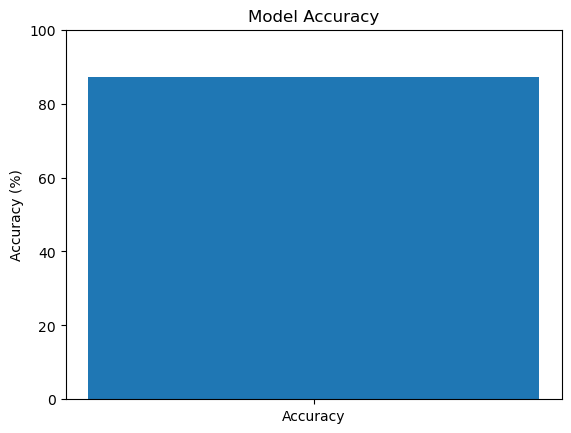

In [37]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you already have your trained model and test data (X_test and y_test)
# Make predictions with your trained RandomForest model
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy: {accuracy * 100:.2f}%")

# Optional: Plot the accuracy as a bar chart
plt.bar(['Accuracy'], [accuracy * 100])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.ylim(0, 100)
plt.show()


In [38]:
# Calculate F1 score for each class
f1_scores = f1_score(y_test, y_pred, average=None)
  # average=None returns F1 score per class

# Print the F1 scores for each class
print(f"F1 Scores for each class: {f1_scores}")

# Plotting the F1 scores for each class
plt.bar(range(len(f1_scores)), f1_scores, color='purple')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Each Class')
plt.xticks(range(len(f1_scores)))  # To label each bar with the class index
plt.show()

NameError: name 'f1_score' is not defined

In [39]:
from sklearn.metrics import f1_score

F1 Scores for each class: [0.72727273 0.93023256 0.71698113 0.91428571 0.92857143 0.86956522
 0.92307692 0.95833333 0.97142857 1.         1.         0.9047619
 0.95       0.93023256 0.8        0.73170732 0.82051282 0.76190476
 0.63157895 0.90909091 0.94339623 0.875     ]


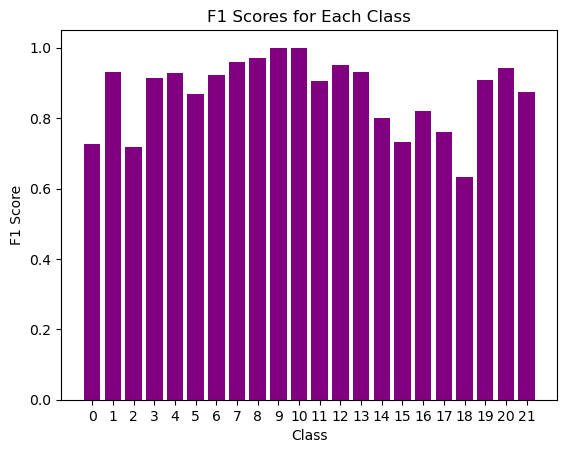

In [40]:
# Calculate F1 score for each class
f1_scores = f1_score(y_test, y_pred, average=None)
print(f"F1 Scores for each class: {f1_scores}")

# Plotting the F1 scores for each class
plt.bar(range(len(f1_scores)), f1_scores, color='purple')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Each Class')
plt.xticks(range(len(f1_scores)))  # To label each bar with the class index
plt.show()

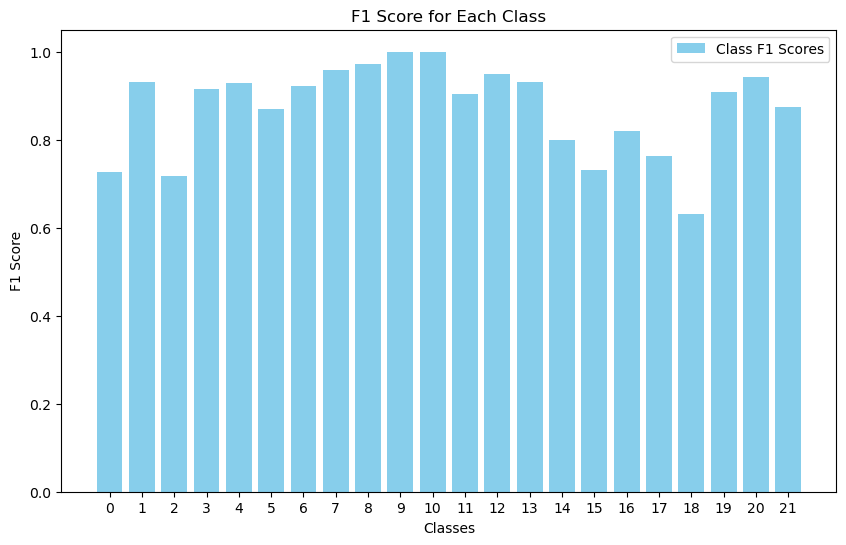

In [41]:
f1 = f1_score(y_test, y_pred, average=None)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# Plotting the F1 scores
classes = [f"{i}" for i in range(len(f1))]  # Label for each class
f1_scores = list(f1)  # F1 scores for each class

plt.figure(figsize=(10, 6))
plt.bar(classes, f1_scores, color='skyblue', label='Class F1 Scores')

# Add macro and weighted average F1 score lines
# plt.axhline(f1_macro, color='red', linestyle='--', label=f'Macro Average F1: {f1_macro:.2f}')
# plt.axhline(f1_weighted, color='green', linestyle='--', label=f'Weighted Average F1: {f1_weighted:.2f}')

# Labels and title
plt.xlabel('Classes')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class')
plt.legend()

# Show the plot
plt.show()

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [43]:
report = classification_report(y_test, y_pred, output_dict=True)

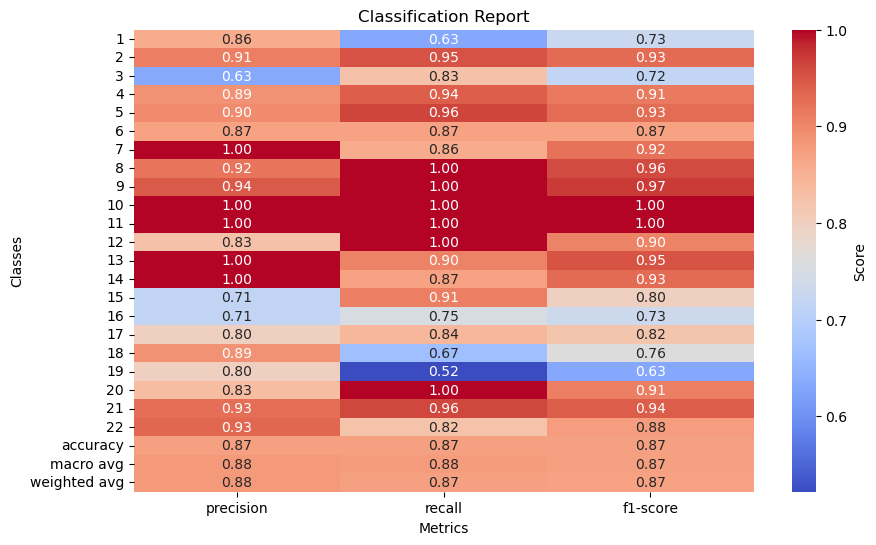

In [45]:
report_df = pd.DataFrame(report).transpose()

# Select precision, recall, and f1-score
metrics = ["precision", "recall", "f1-score"]

# Filter out support column if included
if "support" in report_df.columns:
    report_df = report_df.drop(columns=["support"])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df[metrics], annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Score'})
plt.title("Classification Report")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()